# A problem with Logistic Regression

While logistic regression is a simple, fast, and effective method. However, the predictions depend linearly on the features. This is, after we have learned the parameters $\theta_0,\theta_1,\dots,\theta_m$, given the features $X$, we have a prediction for the a new point $y$:

\begin{equation}
p(y \mid X) = \frac{1}{1+\exp(-(\theta_0 + \sum_{j>0} x_j \theta_j))}
\end{equation}

Let say we choose to predict that $y$ is 1 if $p(y \mid X) > \frac{1}{2}$, therefore, the decision boundary is given by:

\begin{equation}
\frac{1}{1+\exp(-(\theta_0 + \sum_{j>0} x_j \theta_j))} > \frac{1}{2}
\end{equation}

\begin{equation}
1 > \frac{1+\exp(-(\theta_0 + \sum_{j>0} x_j \theta_j))}{2}
\end{equation}

\begin{equation}
2 > 1+\exp(-(\theta_0 + \sum_{j>0} x_j \theta_j))
\end{equation}

\begin{equation}
1 > \exp(-(\theta_0 + \sum_{j>0} x_j \theta_j))
\end{equation}

By taking the log:

\begin{equation}
0 > -(\theta_0 + \sum_{j>0} x_j \theta_j)
\end{equation}

therefore:

\begin{equation}
0 < \theta_0 + \sum_{j>0} x_j \theta_j
\end{equation}

The decision boundary is exactly when the linear combination $X^T\theta = 0$

## The XOR function

A problem of classic importance that clearly shows when linear boundaries do not work is the XOR function. The [XOR function](https://en.wikipedia.org/wiki/Exclusive_or) stands for eXclusive or and it means "one or the other but not both".

Let's define the function now:

In [1]:
import pandas as pd
import numpy as np

In [2]:
X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]])
y = np.array([0, 1, 1, 0])

In [3]:
pd.DataFrame(np.hstack((X, y.reshape(-1, 1))), columns=['x1', 'x2', 'y'])

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

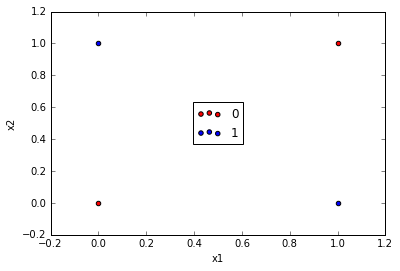

In [6]:
plt.scatter(X[y==0, 0], X[y==0, 1], c='red');
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue');
plt.xlabel('x1');
plt.ylabel('x2');
plt.legend(['0', '1'], loc='center');

The problem with this function is that there is no linear function that correctly can classify the data. It is non-separable.

## Other problems

Sometimes we want to __combine__ features - make them __interact__. But we can't really test all possible combination of features. The space of possible combinations is too large.

## Decision tree

Decision tree recursively partitions the feature space. The decisions are typically simple. Because of the recursive partitioning, the decision can be represented as a tree.

These techniques were originally created to display decisions in a human-redeable fashion. They are therefore easy to read and interpret.

For example, for the XOR problem, is very easy to create a decision tree that solves it with 100% accuracy.

In [7]:
def xor_decision_tree(x):
    x1, x2 = x
    if x1 == 0:
        if x2 == 0:
            return 0
        elif x2 == 1:
            return 1
    elif x1 == 1:
        if x2 == 0:
            return 1
        elif x2 == 1:
            return 0

In [8]:
# accuracy
(list(map(xor_decision_tree, X)) == y).mean()

1.0

### Types of decision trees

In mathematical terms, decision tress partition the feature space into, say, $M$ _regions_ $R_1, ..., R_M$. For each region, we build a prediction based on the training datapoints that fall into that region. 

#### Regression tree
For a regression problem and a region $m$, for example, we may predict that the region value is the mean of the points that belong to that region, denoted by $\hat{y}_{R_m}$. In this simple approach, we evaluate the performance of a regression tree by the squared error of the regression predictions

\begin{equation}
\sum_{m=1}^M \sum_{i\in R_m} (y_i - \hat{y}_{R_m})^2
\end{equation}

#### Classification tree

A similar approach is taken for classification trees, where the dependent variable $y$ is categorical. The classification trees predicts a class $k$ for region $m$ as the _most common training class_ occuring in that region.

To measure the performance of a classification tree, we often measure the proportion of training examples from class $k$ in region $m$, denoted as $\hat{p}_{mk}$. For a particular region, one performance measure is the Gini index

\begin{equation}
G_m = \sum_{k=1}^K \hat{p}_{mk} (1 - \hat{p}_{mk})
\end{equation}

Intuitively, the index is small when the values $\hat{p}_{mk}$ are close to zero or one.

Another measure of performance is cross entropy

\begin{equation}
D_m = - \sum_{k=1}^K \hat{p}_{mk} \text{log}(\hat{p}_{mk})
\end{equation}

where similarly distributions that are highly peaked have the lowest cross entropy.

At the end, we want to minimize either $\sum_m G_M$ or $\sum_m D_m$.

### Building a decision tree

The search of all possible recursive partitions is intractable. So typically the process is split into two steps.

1. Building. The tree is build from the top down (from one feature to all features) in a greedy fashion until some criteria is met.

    1. We start from a region that has every point
    1. We select a feature and a cutting point that splits a region so that the loss is minimized.
    1. We repeat recursively until a criteria, such as number of examples in a leaf, is met.

1. Pruning or regularization. Given a regularization parameter $\alpha$ and starting from the most complex tree found before, we find a new tree that optimizes the following loss function

\begin{equation}
\sum_{m=1}^M \sum_{x_i \in R_m} L(y_i, \hat{f}(x_i)) + \alpha M 
\end{equation}

where $L$ is the loss function either for a regression or classification problem. Since $M$ is the number regions, then $\alpha \mid M \mid$ acts as an $L1$ regularization.

# Problems with decision trees

In one word: __Overfitting__

Question: how many ways can we build a tree for the same dataset?

(from ISRL)

1. The good
    1. Trees are very easy to explain to people. In fact, they are even easier to explain than linear regression!
    1. Some people believe that decision trees more closely mirror human decision-making than do the regression and classification approaches seen in previous chapters.
    1. Trees can be displayed graphically, and are easily interpreted even by a non-expert (especially if they are small).
    1. Trees can easily handle qualitative predictors without the need to create dummy variables.

1. The bad
    1. Unfortunately, trees generally do not have the same level of predictive accuracy as some of the other regression and classification approaches seen in this book.
    1. Additionally, trees can be very non-robust. In other words, a small change in the data can cause a large change in the final estimated tree


# Bagging

The problem with decision trees and other learning methods is that they have _high variance_. If fit into two training set, they can produce very different fits.

One solution to this problem is to _average_ the opinions of several models fit to different training sets. Given that we usually don't have many training sets, we use a technique called _bootstrap_ to produce them. In boostrap, we generate _fictitious_ training sets by _sampling with replacement_ the training set. We do this multiple times, fitting a model to each bootsrap sample, and producing a predicting based on the average of the trees. This is called __bagging__.

## The wisdom of the crowds

One easy way to understand why bagging helps. Image asking $B$ people the opinion about the height of someone. Assume that each person has a high variance $\sigma^2$ in their estimates and no biases. If we average their opinions, what is the variance of the resulting estimate?

In [9]:
import numpy as np

In [10]:
person_std = np.sqrt(10.)
n_simulations = 10000
B = 10
opinions = np.random.normal(scale=person_std, size = (n_simulations, B))

In [11]:
# lets average opinions
avg_opinions = opinions.mean(axis=1)

In [12]:
# let's look at the variance
np.var(avg_opinions)

1.0004557502423832

In [13]:
%matplotlib inline

In [14]:
import matplotlib.pyplot as plt

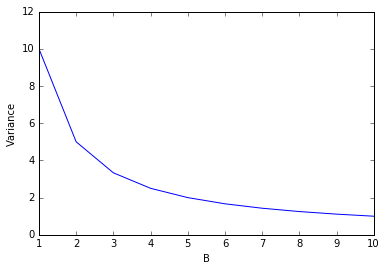

In [15]:
plt.plot(np.linspace(1, 10, num=10), 10/np.linspace(1, 10, num=10));
plt.xlabel('B');
plt.ylabel('Variance');
plt.ylim([0, 12]);

The variance seems to be a 10th of the original variance! Which is exacty right.

## Tree bagging

Similarly to the wisdom of the crowds, you can think of the statistical estimation of models and then bagging as a way of lowering the variance of models!

Therefore, if we fit ($\hat{f}^{*b}$) different decision tree to boostrapped version $b$ of the data, then we can average those results for regression:

\begin{equation}
\hat{f}_{\text{bagging}}(X) = \frac{1}{B} \sum_{b=1}^B  \hat{f}^{*b}(X)
\end{equation}

or in classification

\begin{equation}
\hat{f}_{\text{bagging}}(X) = \text{majority} \{\hat{f}^{*b}(X) \mid b \in \{1, \dots, B \} \}
\end{equation}

The problem with tree bagging is that we have lost the interpretability of results because we are now averaging the prediction of several trees.

One solution to this is to compute, across all trees, how much on average a feature decreases the loss function. We can then use that measure to sort features by importance.

One convenient by-product of bagging is that we can compute the validaton performance of our model by computing the performance of the fit in the _out of bag_ datapoints. This is, every time we sample with replacement from the data, there is a set of datapoints that is not used in the data.

The argument goes like this. A single point has a chance of $1/n$ of being sampled. This means that the probability of a point not being sampled during a bootstrap sample is $(1-\frac{1}{n})^n$. When $\lim_{n\rightarrow \infty} (1-\frac{1}{n})^n = \frac{1}{e} \approx 36% \approx 1/3 $. So, in boostrapped estimators a point will be out of the fitting 1/3 of the time. 

At the end, we will have $B/3$ out of sample estimators for each data which gives us testing performance estimation for free!

### Limitations of the wisdom of the crowds

Now, the wisdom of the crowds assumes that _opinions are independent_, but boostrapping makes the trees dependent because we are resampling the same training data multiple times.

What is the effect of making opinions dependent?

In [16]:
# wisdom of the crowds with opinion correlation
corr = 0.9
B = 1000
cov = (np.ones((B, B)) * corr + np.eye(B)*(1-corr))*(person_std**2)
mu = np.zeros(B)
correlated_opinions = np.random.multivariate_normal(mu, cov, (n_simulations,))

In [17]:
correlated_opinions.mean(1).var()

8.8626101979626046

With 90% correlation, the crowd doesn't do much better than individuals! In general, the variance of correlated opinions is:

\begin{equation}
\text{var}(f) = \bigl( \frac{1-\rho}{B} + \rho \bigr) \sigma^2
\end{equation}

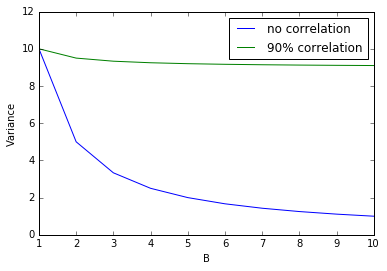

In [18]:
pl1 = plt.plot(np.linspace(1, 10, num=10), 10/np.linspace(1, 10, num=10));
pl2 = plt.plot(np.linspace(1, 10, num=10), 10*((1-0.9)/np.linspace(1, 10, num=10) + 0.9));
plt.xlabel('B');
plt.ylabel('Variance');
plt.ylim([0, 12]);
plt.legend(['no correlation', '90% correlation']);

## Random forest

Random forest is a tweak to the boostrapped trees predictions that decorrelate trees. It does this by randomly sampling $m$ features during each split when bulding the tree. In this way, each of trees look at different features and become decorrelated. A typical value of $m = \sqrt{p}$, where $p$ is the total number of variables.

## Gradient boosting

Boosting _grows_ a model. It first fits a simple model and the next model focuses on samples poorly fit by the previous model. It is a way of _adaptively_ fitting the data. In a sense, boosting does not resample the data. 

Boosting is a technique whose theoretical workings go outside of the scope of this course. Roughly speaking, however, while bagging aims at lowering the variance in the learning process, boosting aims at reducing the bias.

# Application in Spark

In [19]:
import findspark

# use the appropriate path to spark_home
# for example, for cloudera:

try:
    findspark.init(spark_home="/opt/cloudera/parcels/SPARK2/lib/spark2")
except:
    # or if you have it somewhere else
    findspark.init(spark_home="/Users/danielacuna/Downloads/spark-2.0.0-bin-hadoop2.7")

import pyspark
import numpy as np

# conf = pyspark.SparkConf().\
#     setAppName('credit-score').\
#     setMaster('local[*]')

from pyspark.sql import SparkSession

spark = SparkSession.builder.\
    appName("credit-score").\
    master('local[2]').\
    getOrCreate()

# dataframe functions
from pyspark.sql import functions as fn

In [20]:
!rm -rf cs-training.parquet && wget https://github.com/daniel-acuna/python_data_science_intro/blob/master/data/cs-training.parquet.zip?raw=true -O cs-training.parquet.zip && unzip cs-training.parquet.zip && rm cs-training.parquet.zip

--2016-11-04 08:51:48--  https://github.com/daniel-acuna/python_data_science_intro/blob/master/data/cs-training.parquet.zip?raw=true
Resolving github.com... 192.30.253.113, 192.30.253.112
Connecting to github.com|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/daniel-acuna/python_data_science_intro/raw/master/data/cs-training.parquet.zip [following]
--2016-11-04 08:51:49--  https://github.com/daniel-acuna/python_data_science_intro/raw/master/data/cs-training.parquet.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-acuna/python_data_science_intro/master/data/cs-training.parquet.zip [following]
--2016-11-04 08:51:49--  https://raw.githubusercontent.com/daniel-acuna/python_data_science_intro/master/data/cs-training.parquet.zip
Resolving raw.githubusercontent.com... 151.101.32.133
Connecting to raw.githubusercontent.com|151.

In [21]:
import os

In [22]:
credit_score_df = spark.read.parquet('file:///' + os.path.join(os.getcwd(), 'cs-training.parquet'))
# change type to double, drop NAs, and change dependent variable name to label
credit_score_df = credit_score_df.withColumnRenamed('SeriousDlqin2yrs', 'label')

| Variable Name                        | Description                                                                                                                                              | Type       |
|--------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|------------|
| SeriousDlqin2yrs                     | Person experienced 90 days past due delinquency or worse                                                                                                 | Y/N        |
| RevolvingUtilizationOfUnsecuredLines | Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits | percentage |
| age                                  | Age of borrower in years                                                                                                                                 | integer    |
| NumberOfTime30-59DaysPastDueNotWorse | Number of times borrower has been 30-59 days past due but no worse in the last 2 years.                                                                  | integer    |
| DebtRatio                            | Monthly debt payments, alimony,living costs divided by monthy gross income                                                                               | percentage |
| MonthlyIncome                        | Monthly income                                                                                                                                           | real       |
| NumberOfOpenCreditLinesAndLoans      | Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)                                                     | integer    |
| NumberOfTimes90DaysLate              | Number of times borrower has been 90 days or more past due.                                                                                              | integer    |
| NumberRealEstateLoansOrLines         | Number of mortgage and real estate loans including home equity lines of credit                                                                           | integer    |
| NumberOfTime60-89DaysPastDueNotWorse | Number of times borrower has been 60-89 days past due but no worse in the last 2 years.                                                                  | integer    |
| NumberOfDependents                   | Number of dependents in family excluding themselves (spouse, children etc.)                                                                              | integer    |

We need to put the independent variables into one feature vector

In [23]:
from pyspark.ml.feature import VectorAssembler

In [24]:
training_df, validation_df, testing_df = credit_score_df.randomSplit([0.6, 0.3, 0.1])

In [25]:
# build a pipeline for analysis
va = VectorAssembler().setInputCols(training_df.columns[2:]).setOutputCol('features')

In [26]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier

In [27]:
from pyspark.ml import Pipeline

In [28]:
lr = LogisticRegression(regParam=0.1)

In [29]:
lr_pipeline = Pipeline(stages=[va, lr]).fit(training_df)

In [30]:
rf = RandomForestClassifier()

In [31]:
rf_pipeline = Pipeline(stages=[va, rf]).fit(training_df)

In [32]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [33]:
bce = BinaryClassificationEvaluator()

In [34]:
bce.evaluate(lr_pipeline.transform(validation_df))

0.6638844448026403

In [35]:
bce.evaluate(rf_pipeline.transform(validation_df))

0.8544081804237617

Without much changes, Random Forest performs much better!

# Try to interpret the results

## Logistic regression

In [36]:
lr_model = lr_pipeline.stages[-1]

In [37]:
import pandas as pd

In [38]:
pd.DataFrame(list(zip(credit_score_df.columns[2:], lr_model.coefficients.toArray())),
            columns = ['column', 'weight']).sort_values('weight')

,column,weight
1,age,-0.010155
5,NumberOfOpenCreditLinesAndLoans,-0.005847
3,DebtRatio,-0.000018
0,RevolvingUtilizationOfUnsecuredLines,-0.000008
4,MonthlyIncome,-0.000003
8,NumberOfTime60-89DaysPastDueNotWorse,0.001003
7,NumberRealEstateLoansOrLines,0.002961
6,NumberOfTimes90DaysLate,0.012715
2,NumberOfTime30-59DaysPastDueNotWorse,0.020933
9,NumberOfDependents,0.050313


## Random forest

In [39]:
rf_model = rf_pipeline.stages[-1]

In [40]:
pd.DataFrame(list(zip(credit_score_df.columns[2:], rf_model.featureImportances.toArray())),
            columns = ['column', 'weight']).sort_values('weight')

,column,weight
9,NumberOfDependents,0.004338
7,NumberRealEstateLoansOrLines,0.004882
1,age,0.010157
3,DebtRatio,0.012272
5,NumberOfOpenCreditLinesAndLoans,0.012705
4,MonthlyIncome,0.015520
2,NumberOfTime30-59DaysPastDueNotWorse,0.114192
0,RevolvingUtilizationOfUnsecuredLines,0.143338
8,NumberOfTime60-89DaysPastDueNotWorse,0.250695
6,NumberOfTimes90DaysLate,0.431902


Let's take a look at one tree

In [41]:
len(rf_model.trees)

20

In [42]:
print(rf_model.trees[0].toDebugString)

DecisionTreeClassificationModel (uid=dtc_fcb008986019) of depth 5 with 63 nodes
  If (feature 8 <= 0.0)
   If (feature 4 <= 6630.0)
    If (feature 6 <= 0.0)
     If (feature 9 <= 0.0)
      If (feature 1 <= 58.0)
       Predict: 0.0
      Else (feature 1 > 58.0)
       Predict: 0.0
     Else (feature 9 > 0.0)
      If (feature 2 <= 0.0)
       Predict: 0.0
      Else (feature 2 > 0.0)
       Predict: 0.0
    Else (feature 6 > 0.0)
     If (feature 3 <= 0.182492806)
      If (feature 0 <= 0.664650863)
       Predict: 0.0
      Else (feature 0 > 0.664650863)
       Predict: 0.0
     Else (feature 3 > 0.182492806)
      If (feature 6 <= 1.0)
       Predict: 0.0
      Else (feature 6 > 1.0)
       Predict: 1.0
   Else (feature 4 > 6630.0)
    If (feature 0 <= 0.503625677)
     If (feature 6 <= 0.0)
      If (feature 7 <= 11.0)
       Predict: 0.0
      Else (feature 7 > 11.0)
       Predict: 0.0
     Else (feature 6 > 0.0)
      If (feature 9 <= 0.0)
       Predict: 0.0
      Else (featur